In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### entropy

In [2]:
with open('./dataset/intervention_data/gpt2_train=False_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [3]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [4]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [5]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [6]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

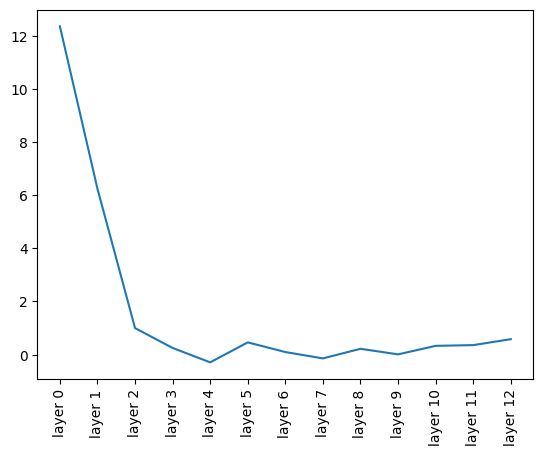

In [7]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

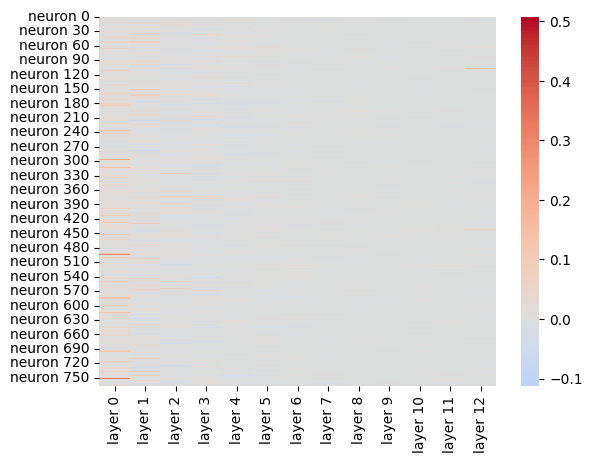

In [8]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

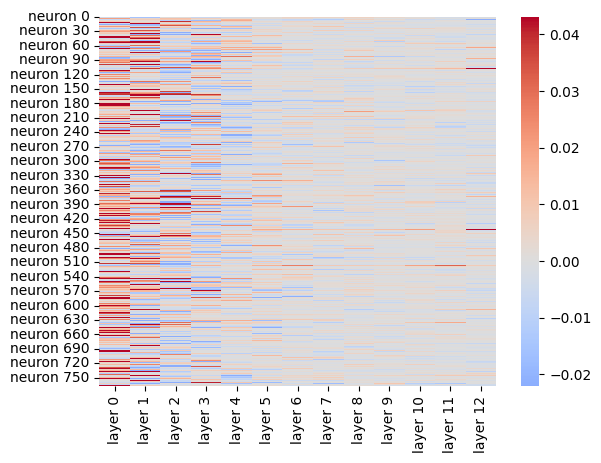

In [9]:
sns.heatmap(mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

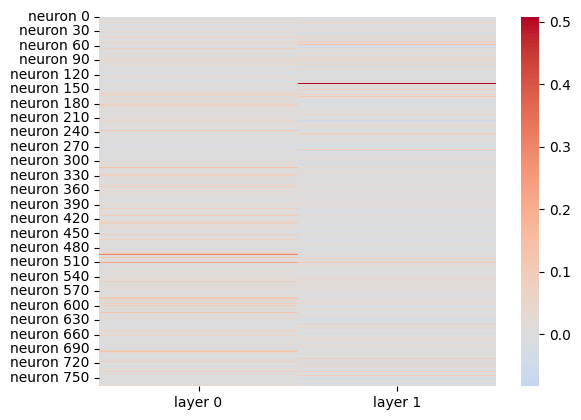

In [10]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

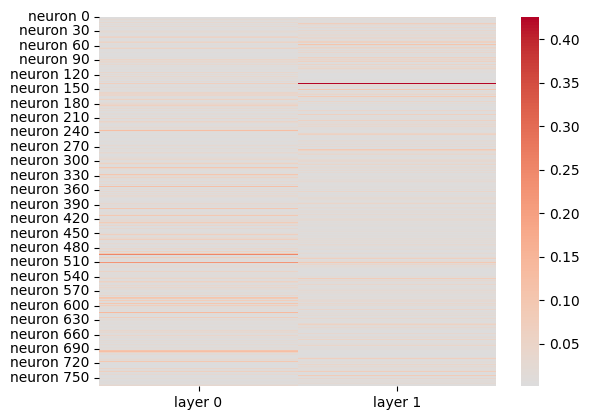

In [11]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm',center=0)

## Fine tuning Indirect Effect

### entropy

In [12]:
with open('./dataset/intervention_data/gpt2_train=True_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [13]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [14]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [15]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [16]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [17]:
len(fine_df_list)

4380

In [18]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.000662,0.014647,0.008862,-0.004114,-0.003408,-0.000445,-0.009327,-0.004318,-0.001978,0.005432,0.000434,0.007847,-0.000862
neuron 1,0.001182,-0.003879,-0.001321,0.002205,0.001600,0.000340,-0.000615,-0.002418,0.002279,-0.002622,0.000590,-0.002273,-0.000322
neuron 2,-0.001923,0.011052,0.000740,0.001150,-0.000264,0.001038,0.000128,0.000268,-0.001590,0.000428,-0.002761,-0.001730,-0.008298
neuron 3,-0.019692,-0.000710,0.002486,-0.000709,-0.000618,-0.001447,0.001792,0.001388,-0.001234,-0.000171,0.000668,-0.000813,-0.001312
neuron 4,0.002770,0.001234,-0.001499,-0.000089,0.003140,0.000245,-0.000722,-0.000569,0.000067,-0.001434,-0.008276,0.000255,-0.006204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.004985,0.005203,0.000297,0.000247,-0.000283,0.001335,0.000368,-0.000507,-0.000398,0.000367,0.000714,-0.001735,0.001872
neuron 764,-0.011888,-0.008156,-0.000747,-0.001297,-0.000923,-0.000196,0.000337,-0.000769,-0.000159,-0.003064,-0.000831,-0.001236,0.000757
neuron 765,-0.002628,-0.006015,-0.001980,0.000466,0.003790,0.003824,0.004445,0.008110,0.005233,0.003740,-0.002689,0.006701,0.005695
neuron 766,0.037346,0.003296,-0.003190,-0.000149,-0.002380,-0.000562,0.000489,0.000592,-0.000293,-0.001736,-0.002072,-0.000029,-0.000236


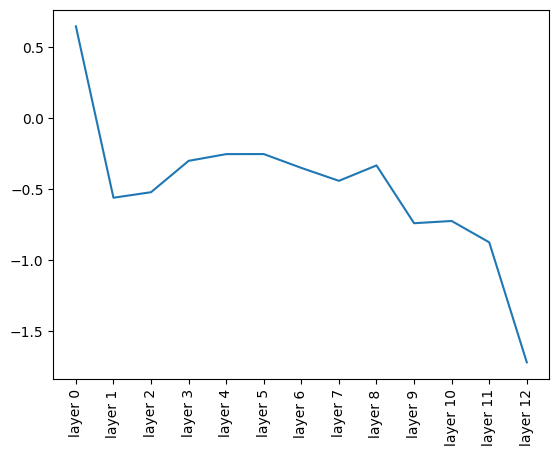

In [19]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

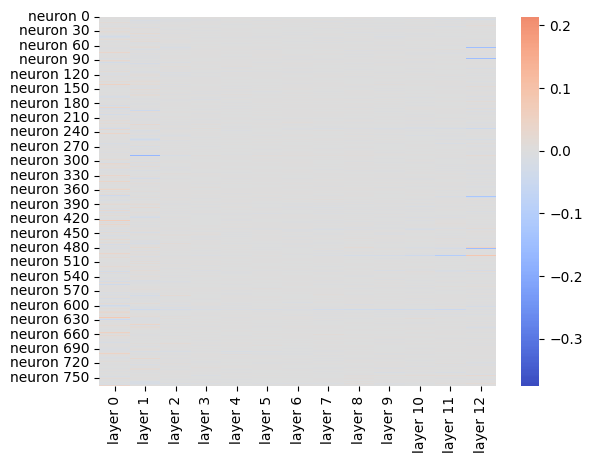

In [20]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

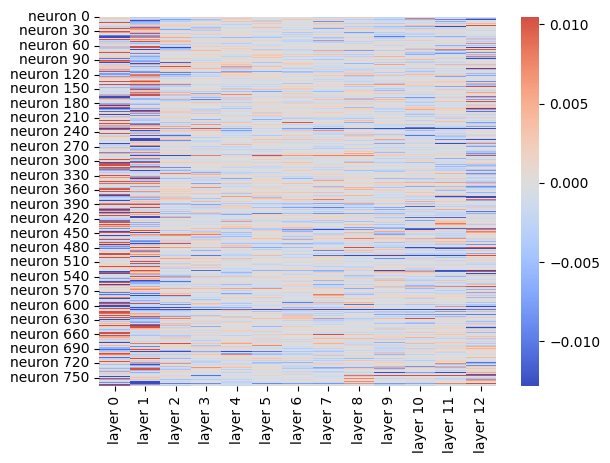

In [21]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

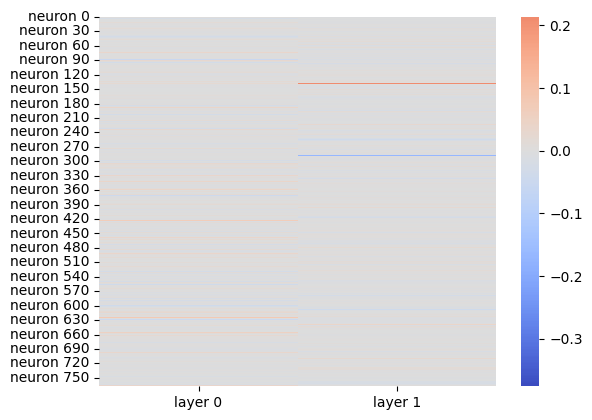

In [22]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

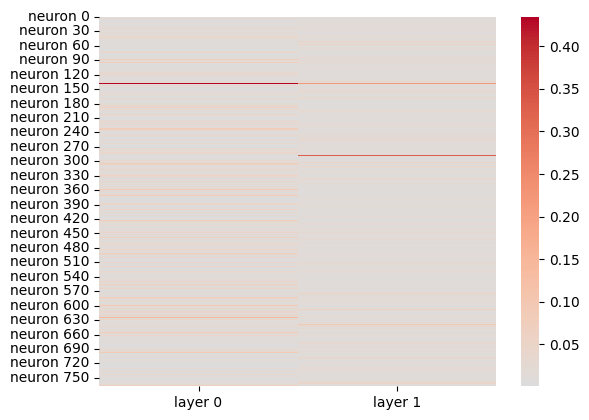

In [23]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm',center=0)

### Fine tuning 전,후 비교

In [24]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 752    0.329030
neuron 494    0.298720
neuron 510    0.232302
neuron 297    0.218843
neuron 264    0.204266
neuron 345    0.201327
neuron 233    0.162521
neuron 65     0.151440
neuron 661    0.144932
neuron 162    0.144805
neuron 313    0.140295
neuron 532    0.136164
neuron 177    0.134302
neuron 236    0.132496
neuron 614    0.129561
neuron 492    0.128953
neuron 695    0.125958
neuron 585    0.119015
neuron 364    0.112589
neuron 437    0.110788
Name: layer 0, dtype: float64

neuron 138    0.507988
neuron 92     0.356859
neuron 372    0.351464
neuron 503    0.278365
neuron 57     0.143180
neuron 48     0.124639
neuron 165    0.112413
neuron 510    0.108401
neuron 151    0.104946
neuron 745    0.094402
neuron 275    0.093475
neuron 264    0.092890
neuron 164    0.089324
neuron 737    0.089175
neuron 710    0.089116
neuron 430    0.088530
neuron 51     0.088226
neuron 441    0.086446
neuron 502    0.076471
neuron 14     0.074833
Name: layer 1, dtype: float64

In [25]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 264    0.091080
neuron 625    0.078795
neuron 423    0.067925
neuron 362    0.061926
neuron 262    0.059061
neuron 181    0.056949
neuron 656    0.052714
neuron 141    0.051456
neuron 106    0.049339
neuron 700    0.045782
neuron 426    0.044130
neuron 188    0.040521
neuron 162    0.040413
neuron 342    0.039777
neuron 359    0.039373
neuron 243    0.039234
neuron 437    0.037911
neuron 492    0.037561
neuron 766    0.037346
neuron 233    0.037234
Name: layer 0, dtype: float64

neuron 138    0.213777
neuron 92     0.071436
neuron 570    0.040770
neuron 639    0.040170
neuron 503    0.031820
neuron 710    0.029541
neuron 399    0.028144
neuron 224    0.025094
neuron 396    0.023247
neuron 162    0.022548
neuron 478    0.022022
neuron 479    0.021799
neuron 233    0.019431
neuron 767    0.019407
neuron 35     0.018378
neuron 51     0.017762
neuron 57     0.017653
neuron 343    0.017564
neuron 643    0.017492
neuron 646    0.017015
Name: layer 1, dtype: float64

In [26]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 234   -0.022699
neuron 615   -0.022820
neuron 16    -0.023099
neuron 267   -0.025395
neuron 505   -0.027526
neuron 40    -0.029084
neuron 266   -0.032103
neuron 273   -0.033325
neuron 622   -0.033528
neuron 481   -0.033781
neuron 391   -0.034147
neuron 640   -0.035178
neuron 134   -0.035545
neuron 401   -0.038019
neuron 395   -0.040193
neuron 85    -0.041077
neuron 115   -0.042440
neuron 451   -0.044539
neuron 218   -0.051086
neuron 38    -0.054787
Name: layer 0, dtype: float64

neuron 160   -0.036789
neuron 547   -0.037353
neuron 751   -0.038956
neuron 740   -0.039508
neuron 684   -0.039656
neuron 640   -0.039794
neuron 250   -0.040078
neuron 659   -0.043396
neuron 307   -0.044434
neuron 627   -0.044994
neuron 586   -0.045238
neuron 176   -0.049223
neuron 64    -0.054100
neuron 393   -0.057943
neuron 278   -0.058925
neuron 630   -0.060468
neuron 526   -0.063710
neuron 215   -0.066629
neuron 169   -0.067530
neuron 322   -0.083058
Name: layer 1, dtype: float64

In [27]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 347   -0.025868
neuron 761   -0.025893
neuron 663   -0.027721
neuron 529   -0.027914
neuron 191   -0.029119
neuron 41    -0.029350
neuron 203   -0.029618
neuron 232   -0.030102
neuron 95    -0.030948
neuron 100   -0.033268
neuron 364   -0.035016
neuron 556   -0.035062
neuron 341   -0.035638
neuron 600   -0.041004
neuron 371   -0.042760
neuron 629   -0.047502
neuron 9     -0.047617
neuron 88    -0.055527
neuron 401   -0.056554
neuron 337   -0.065553
Name: layer 0, dtype: float64

neuron 448   -0.019515
neuron 257   -0.019765
neuron 253   -0.020481
neuron 206   -0.021461
neuron 97    -0.022148
neuron 653   -0.023644
neuron 709   -0.024622
neuron 19    -0.025289
neuron 336   -0.025376
neuron 417   -0.025929
neuron 160   -0.027598
neuron 579   -0.028946
neuron 553   -0.031447
neuron 255   -0.035625
neuron 50    -0.038566
neuron 608   -0.040318
neuron 721   -0.042366
neuron 195   -0.044441
neuron 288   -0.168993
neuron 393   -0.375531
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐